# India Start-ups Ecosystem Data Analysis

**Business Understanding**      

**Objective**

This is India start-ups ecosystem Data analysis project, this project will focus on investigating the India start-ups ecosystem, propose the best course of action and analyze the funding received by start-ups in India from 2018 to 2021, using the provided data set gotten from three different source namely Database, One drive and GitHub Repository.The analysis will provide insights into various aspects of start-ups in India, such as funding trends, industry distribution, geographical spread, and key players in the market. The data analysis will be performed using Python and various libraries such as pandas, numpy, matplotlib, and seaborn.

**Hypothesis Statements**

**Null Hypothesis (H0):**
Startups with multiple founders tend to raise significantly more money than those with a single founder.

**Alternative Hypothesis (H1):**
Startups with multiple founders do not raise significantly more money than those with a single founder.


**Uderstanding each column in the data set**

**1.Company_Brand:** The name of the company.

**2.Founded:** The year in which the company was founded.

**3.HeadQuarter:** The city in which the company Haedquarter is located.

**4.Sector:** The sector in which the company operates.

**5.What_it_does:** What the company does and in to.

**6.Founders:** The number of founders in the company.

**7.Investor:** The number of investors in the company.

**8.Amount:** The total funding amount received.

**9.Stage:** The stage in which the company is in e.g (Pre-seed, Seed,Series C)


Having gain deep understanding of each column in the data set this will help us come up with some analytical questions that can be answered using the data set.

**Analytical questions:**

Question 1: What is the average funding amount for startups based in different cities?

Question 2: How does the total investment compare across different sectors?

Which sectors have received the most and least funding?

Question 3: What is the distribution of investment amounts across different stages of funding?

How does the funding amount differ between Seed, Pre-series, Series A, Series B, etc.?

Question 4: Is there a significant difference in the amount of funding received by companies with single founders versus multiple founders?

What is the average funding for single-founder startups compared to multi-founder startups?

Question 5: How does the age of the company (years since founding) relate to the stage of funding?

Are newer companies more likely to be in the Seed or Pre-series stage?

Question 6: What is the distribution of funding amounts within specific sectors?

For example, within HealthTech or FinTech, how are the investments distributed?

Question 7: What are the common investors in different sectors and stages?

Are there any investors that frequently appear across multiple companies or sectors?

Question 8: How many companies are in each stage of funding?

What is the proportion of companies in Seed, Pre-series, Series A, Series B, etc.?

Question 9: How does the number of founders correlate with the stage of funding?

Are there more single-founder companies in the early stages of funding compared to later stages?



**Data Understanding**

In [1]:
## import the necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pyodbc
from dotenv import dotenv_values
import os


#data visualization 
import matplotlib.pyplot as plt
import seaborn as sns


## Create .env file 

The sensitive nature of the database credentials where to get the first dataset from requires that i hide the information such as username, password etc. from public hence need to create a .env file to hide the information

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables=dotenv_values('.env')


# Put the values of the credentials set in the "env" file 
database=environment_variables.get("DATABASE")
server=environment_variables.get("SERVER")
username=environment_variables.get("USERNAME")
password=environment_variables.get("PASSWORD")

# Using f strings to connect to the database.
connection_string= f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [3]:
# connect the data using pyodbc.
connection=pyodbc.connect(connection_string)

In [4]:
# Let get the tables in the database be read into a dataframe.
query = ''' SELECT *
            FROM INFORMATION_SCHEMA.TABLES
            WHERE TABLE_TYPE = 'BASE TABLE' '''

database_tables=pd.read_sql(query,connection)
print(database_tables)

  TABLE_CATALOG TABLE_SCHEMA               TABLE_NAME  TABLE_TYPE
0         dapDB          dbo  LP1_startup_funding2021  BASE TABLE
1         dapDB          dbo  LP1_startup_funding2020  BASE TABLE


In [5]:
# import the start_up funding 2021 dataset from the database and name it, data_2021
query = "SELECT * FROM dbo.LP1_startup_funding2021"

data_2021 = pd.read_sql(query, connection)
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [6]:
# add the funding year.
data_2021['year'] = 2021
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


In [7]:
#check for info on 2021 dataset.
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
 9   year           1209 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


In [8]:
## check the shape to know the number of columns and rows.
data_2021.shape


(1209, 10)

In [9]:
## check for duplicates
data_2021.duplicated().sum()

19

In [10]:
## Checking for nulls
data_2021.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
year               0
dtype: int64

In [11]:
# Descriptive analysis.
data_2021.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Brand,1209,1033,BharatPe,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,1208.0,NaN,NaN,NaN,2016.655629,4.517364,1963.0,2015.0,2018.0,2020.0,2021.0
HeadQuarter,1208,70,Bangalore,426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,1209,254,FinTech,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,1209,1143,BharatPe develops a QR code-based payment app ...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,1205,1095,"Ashneer Grover, Shashvat Nakrani",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,1147,937,Inflection Point Ventures,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,1206,278,$Undisclosed,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,781,31,Seed,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1209.0,NaN,NaN,NaN,2021.0,0.0,2021.0,2021.0,2021.0,2021.0,2021.0


Notes:

The most invested companies in are FinTech sector

Most companies were located in Bangalore

In [12]:
# import the start_up funding 2020 dataset from the database and name it, data_2020
query = "SELECT * FROM dbo.LP1_startup_funding2020"

data_2020 = pd.read_sql(query, connection)
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [13]:
# Add the funding year.
data_2020['year'] = 2020
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020


In [14]:
#check for info 
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
 10  year           1055 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 90.8+ KB


In [15]:
## check for number of columns and rows
data_2020.shape



(1055, 11)

In [16]:
## check for duplicates
data_2020.duplicated().sum()

3

In [17]:
## Check for nulls
data_2020.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
year                0
dtype: int64

In [18]:
# Descriptive analysis
data_2020.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Brand,1055,905,Nykaa,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,842.0,NaN,NaN,NaN,2015.36342,4.097909,1973.0,2014.0,2016.0,2018.0,2020.0
HeadQuarter,961,77,Bangalore,317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,1042,302,Fintech,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,1055,990,Provides online learning classes,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,1043,927,Falguni Nayar,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,1017,848,Venture Catalysts,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,801.0,NaN,NaN,NaN,113042969.543071,2476634939.888347,12700.0,1000000.0,3000000.0,11000000.0,70000000000.0
Stage,591,42,Series A,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column10,2,2,Pre-Seed,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note that

Most of the companies headquarter are at Bangalore

Average Amount invested was 113042969.54

In [19]:
# import the start_up funding 2019 dataset from the database and name it, data_2019
data_2019 = pd.read_excel(r"C:\Users\USER\Desktop\indian start-up\Indian-start-up-ecosystem-Analysis\Data\startup_funding2019.xlsx")
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000,Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000,Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000,Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000,NaN


In [20]:
# Add the funding year.
data_2019['year'] = 2019
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000,NaN,2019


In [21]:
# check for info 2019 data.
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
 9   year           89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


In [22]:
## check for number of columns and rows
data_2019.shape


(89, 10)

In [23]:
## Check for nulls
data_2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
year              0
dtype: int64

In [24]:
## check for duplicates
data_2019.duplicated().sum()

0

In [25]:
# Descriptive analysis
data_2019.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company/Brand,89,87,Kratikal,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,60.0,NaN,NaN,NaN,2014.533333,2.937003,2004.0,2013.0,2015.0,2016.25,2019.0
HeadQuarter,70,17,Bangalore,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,84,52,Edtech,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What it does,89,88,Online meat shop,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,86,85,"Vivek Gupta, Abhay Hanjura",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,89,86,Undisclosed,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),89,50,Undisclosed,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,43,15,Series A,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,89.0,NaN,NaN,NaN,2019.0,0.0,2019.0,2019.0,2019.0,2019.0,2019.0


### Notes:

Most companies headquarters are in Bangalore

Most companies are involved in the Edtech sector 

In [26]:
# import the start_up funding 2018 dataset from the database and name it, data_2018
data_2018= pd.read_csv(r"C:\Users\USER\Desktop\indian start-up\Indian-start-up-ecosystem-Analysis\Data\startup_funding2018.csv")
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [27]:
# Add the funding year.
data_2018['year'] = 2018
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


In [28]:
#check for info on data 2018
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   year           526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


In [29]:
## chec for number of columns and rows
data_2018.shape


(526, 7)

In [30]:
# Descriptive analysis.
data_2018.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company Name,526,525,TheCollegeFever,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry,526,405,—,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Round/Series,526,21,Seed,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,526,198,—,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,526,50,"Bangalore, Karnataka, India",102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
About Company,526,524,"TheCollegeFever is a hub for fun, fiesta and f...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,526.0,NaN,NaN,NaN,2018.0,0.0,2018.0,2018.0,2018.0,2018.0,2018.0


Notes:

Seed series is the most preffered

most companies were located in Bangalore location

In [31]:
# Cleaning the Amount column.
# Replace '₹', commas, '—', and "''" in 'Amount' column
data_2018['Amount'] = data_2018['Amount'].str.replace(',', '').str.replace('—', '').str.replace("''",'').replace('', np.nan)

# Conditionally apply multiplication only where '₹' is present
mask = data_2018['Amount'].str.contains('₹', na=False)
data_2018.loc[mask, 'Amount'] = data_2018.loc[mask, 'Amount'].str.replace('₹', '').astype(float) * 0.0146

In [32]:
# Cocatenate the data.
def concat_dataframes(data1,data2, data3, data4):
    """
    Concatenates four dataframes along the row axis.

    Parameters:
    data_2021 (pandas.DataFrame): The first dataframe to concatenate.
    data_2020 (pandas.DataFrame): The second dataframe to concatenate.
    data_2019 (pandas.DataFrame): The third dataframe to concatenate.
    data_2018 (pandas.DataFrame): The fourth dataframe to concatenate.

    Returns:
    pandas.DataFrame: The concatenated dataframe.
    """
    # Rename columns to make them consistent across dataframes for easy contenation.
    df1 = data_2021.rename(columns={'Company_Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What_it_does': 'about_company','Founders':'founders','Investor':'investor','Amount':'amount','Stage':'series', 'year' : 'year'})
    df2 = data_2020.rename(columns={'Company_Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What_it_does': 'about_company','Founders':'founders','Investor':'investor','Amount':'amount','Stage':'series','year' : 'year'})
    df3 = data_2019.rename(columns={'Company/Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What it does': 'about_company','Founders':'founders','Investor':'investor','Amount($)':'amount','Stage':'series','year' : 'year'})
    df4 = data_2018.rename(columns={'Company Name': 'company_brand','Location': 'headquarter','Industry': 'sector','About Company': 'about_company','Amount':'amount','Round/Series':'series','year' : 'year'})

    # Concatenate dataframes along the row axis
    result = pd.concat([df1, df2, df3,df4], axis=0)

    return result


In [33]:
df= concat_dataframes(data_2021,data_2020,data_2019,data_2018)
df.head()

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year,column10
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021,NaN
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021,NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021,NaN
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021,NaN
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021,NaN


Data Validation

In [34]:
# Check the info of the.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 525
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   headquarter    2765 non-null   object 
 3   sector         2861 non-null   object 
 4   about_company  2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2253 non-null   object 
 7   amount         2474 non-null   object 
 8   series         1941 non-null   object 
 9   year           2879 non-null   int64  
 10  column10       2 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 269.9+ KB


In [35]:
# Check the number of rows and columns.
df.shape

(2879, 11)

In [36]:
# check the statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
founded,2110.0,2016.079621,4.368006,1963.0,2015.0,2017.0,2019.0,2021.0
year,2879.0,2020.023619,1.086974,2018.0,2020.0,2020.0,2021.0,2021.0


In [37]:
df.describe(include='all')

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year,column10
count,2879,2110.000000,2765,2861,2879,2334,2253,2474,1941,2879.000000,2
unique,2214,NaN,172,873,2691,1980,1777,765,75,NaN,2
top,BharatPe,NaN,Bangalore,FinTech,Provides online learning classes,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures,$Undisclosed,Seed,NaN,Pre-Seed
freq,10,NaN,764,173,5,7,36,73,606,NaN,1
mean,NaN,2016.079621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.023619,NaN
std,NaN,4.368006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.086974,NaN
min,NaN,1963.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN
25%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,NaN
75%,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000,NaN


In [38]:
# Check for null values.
df.isna().sum()

company_brand       0
founded           769
headquarter       114
sector             18
about_company       0
founders          545
investor          626
amount            405
series            938
year                0
column10         2877
dtype: int64

In [39]:
df.duplicated().sum()

23

In [40]:
df.nunique()

company_brand    2214
founded            34
headquarter       172
sector            873
about_company    2691
founders         1980
investor         1777
amount            765
series             75
year                4
column10            2
dtype: int64

Notes:

The 2018 dataset contains some missing columns.

The naming conventions for the columns in the 2018 and 2019 datasets differ from those in the 2020 and 2021 datasets.

The 2020 dataset includes an extra column that seems unnecessary and does not contribute any significant value to the analysis.



In [41]:
# Reser index.
df = df.reset_index(drop=True)

In [42]:
#Drop the column 10 column 10 as it contains only null values.
df.drop('column10', axis=1, inplace= True)

In [43]:
def swap_row_cells(df, row_index, col1_index, col2_index):
    """
    Swaps the values in the given columns and row of a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    row_index (int): The index of the row where the values will be swapped.
    col1_index (int): The index of the first column.
    col2_index (int): The index of the second column.

    Returns:
    pandas.DataFrame: The modified DataFrame with swapped values.
    """
    # Swap the values in the specified row and columns
    df.loc[row_index, [col1_index, col2_index]] = df.loc[row_index, [col2_index, col1_index]].values
    
    # Return the modified DataFrame
    return df


In [44]:
# correcting all the cells with wrong entries
#### row index 1100 
swap_row_cells(df, 1100, 'investor', 'amount')
swap_row_cells(df, 1100, 'founders', 'investor')
swap_row_cells(df, 1100, 'about_company', 'founders')
swap_row_cells(df, 1100, 'sector', 'about_company')
swap_row_cells(df, 1100, 'headquarter', 'sector')

#### row index 257
swap_row_cells(df, 257, 'amount', 'series')
swap_row_cells(df, 257, 'investor', 'amount')
swap_row_cells(df, 257,'founders', 'investor')
swap_row_cells(df, 257,'about_company', 'founders')
swap_row_cells(df, 257,'sector', 'about_company')

#### row index 242
swap_row_cells(df,242,'amount', 'series' )
swap_row_cells(df,242,'investor', 'amount' )
swap_row_cells(df, 242, 'founders', 'investor')
swap_row_cells(df, 242, 'about_company', 'founders')
swap_row_cells(df, 242, 'sector', 'about_company')
swap_row_cells(df,242, 'headquarter', 'sector')

### row index 256
swap_row_cells(df, 256, 'amount', 'series')
swap_row_cells(df, 256, 'investor', 'amount')
swap_row_cells(df, 256, 'founders', 'investor')
swap_row_cells(df, 256, 'about_company', 'founders')
swap_row_cells(df, 256, 'sector', 'about_company')
swap_row_cells(df, 256, 'headquarter', 'sector')

#### row index 241
swap_row_cells(df, 241, 'headquarter', 'sector')

#### row index 1176
swap_row_cells(df, 1176, 'headquarter', 'sector')

#### row index 255
swap_row_cells(df, 255, 'headquarter', 'sector')

#### row index 538
swap_row_cells(df, 538, 'amount', 'series')

#### row index 1148
swap_row_cells(df, 1148, 'amount', 'series')
swap_row_cells(df, 1148, 'investor', 'amount')

### row index 677
swap_row_cells(df, 677, 'amount', 'series')

#### row index 551
swap_row_cells(df, 551, 'amount', 'series')

#### row index 545
swap_row_cells(df, 545, 'amount', 'series')
swap_row_cells(df,545, 'investor', 'amount')

#### row index 98
swap_row_cells(df, 98, 'amount', 'series')

#### row index 111
swap_row_cells(df, 111, 'amount', 'series')

### row index 674
swap_row_cells(df, 674, 'amount', 'series')



# replace computer games with none 
df['headquarter'] = df['headquarter'].replace('Computer Games', None)


In [45]:
# Cleaning the 'company_brand column.

#check for missing values
df['company_brand'].isnull().sum()


0

In [46]:
# Check the unique values.
df['company_brand'].unique()

array(['Unbox Robotics', 'upGrad', 'Lead School', ..., 'Mombay',
       'Droni Tech', 'Netmeds'], dtype=object)

In [47]:
# check for duplicates.

df['company_brand'].duplicated().sum()

665

Note: There are companies with unique names dealing in different sectors so the duplicate will not be removed.

In [48]:
# Cleaning the  'founded'.
# Check for null values. 
df['founded'].isna().sum()



769

In [49]:
# Fill the nulls with interpolated values.
df["founded"].interpolate(method='linear',inplace= True)



In [50]:
# Change the datatype to datetime and format it to year.
df['founded'] = pd.to_datetime(df['founded'], format='%Y')

# Convert datetime to period with yearly frequency.
df['founded'] = df['founded'].dt.to_period('Y')


In [51]:
# Clean the 'headquarter' column.
df['headquarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Cochin',
       'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara', 'Hauz Khas',
       'Gurugram\t#REF!', 'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana',
       'Indore', 'Powai', 'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna',
       'Samsitpur', 'Lucknow', 'Telangana', 'Silvassa',
       'Thiruvananthapuram', 'Faridabad', 'Roorkee', 'Ambernath',
       'Panchkula', 'Surat', 'Coimbatore', 'Andheri', 'Mangalore',
       'Telugana', 'Bhubaneswar', 'Kottayam', 'Beijing', 'Panaji',
       'Satara', 'Orissia', 'Jodhpur', 'New York', 'Santra',
       'Mountain View, CA', 'Trivandrum', 'Jharkhand', 'Kanpur',
       'Bhilwara', 'Guwahati', 'Kochi', 'London',
       'Manchester, Greater Manchester', 'The Nilgiris', 'Gandhinagar',
       'Belgaum', 'Tirunelveli, Tami

In [52]:
df['headquarter'].isnull().sum()


119

In [53]:
def clean_replace(dataframe,column_name):
    dataframe[column_name] = dataframe[column_name].replace('—', np.nan)
    #clean the nan values with none
    dataframe[column_name] = dataframe[column_name].fillna(value='None')

    return dataframe

In [54]:
clean_replace(df,"headquarter")

df['headquarter'].isnull().sum()

0

In [55]:
# Remove all the unnecessary values.
df['headquarter']= df['headquarter'].str.split(',').str[0].str.replace("'","", regex=True)
df['headquarter'] = df['headquarter'].str.strip('\t#REF!')

In [56]:
# Correct the wrong spelling and put only city names.
df['headquarter']=df['headquarter'].replace({'Bengaluru': 'Bangalore', 'Banglore': 'Bangalore', 'Gurugram': 'Gurgaon', 'Hyderebad': 'Hyderabad', 
                                      'New Delhi': 'Delhi', 'Ahmadabad': 'Ahmedabad', 'Ernakulam': 'Cochin', 'Telugana': 'Telangana',
                                      'Rajastan': 'Rajasthan', 'San Franciscao': 'San Francisco', 'Samsitpur': 'Samastipur', 'Santra': 'Samtra',
                                      'Rajsamand': 'Rajasthan', 'Kerala': 'Kochi','The Nilgiris': 'Nilgiris', 'Gurugram': 'Gurgaon', 
                                      'California': 'San Francisco', 'San Francisco Bay Area': 'San Francisco', 'Hyderebad': 'Hyderabad' ,'Small Towns': 'Small Towns','Orissia': 'Odisha', 
                                      'Santra': 'Samtra', 'Vadodara': 'Vadodara', 'Bangaldesh': 'Bangladesh',}) 


In [57]:
# Clean the Sector column.
# Check the unique.
df["sector"].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [58]:
df['sector'].isnull().sum()

19

Note:

Unidentified sectors/industries have no data available.

Unidentified sectors require replacement with real industry names.


In [59]:
# import regular expressions.
import re

In [60]:
# Remove commas and semicolons.
df['sector'] = df['sector'].str.split(',').str[0].str.replace("'", '', regex=True)

In [61]:
# Fill appropriate sector.
df['sector'].replace('Android','Edtech', inplace=True, regex=True)
df['sector'].replace('Crowdfunding', 'Crowdsourcing', inplace=True ,regex=True)
df['sector'].replace('Wellness', 'HealthTech',inplace=True ,regex=True)
df['sector'].replace('Basketball', ' Apps', inplace=True, regex=True)
df['sector'].replace('Catering', 'Food Industry', inplace=True, regex=True)
df['sector'].replace('Cooking', 'Food Industry',inplace=True, regex=True)

In [62]:

def categorize_sector(df):
    # replace renewables 
    df['sector'].replace(['Solar Monitoring Company','Solar','Solar solution','Renewable Energy',
                           'Solar Solution','Solar SaaS','Photonics startup','Renewables & Environment',
                           ],'Renewable player')
    #replace fashion sectors
    df['sector']=df['sector'].replace(['Cosmetics','Personal care startup','Jewellery startup','Fashion','Fashion & Lifestyle',
                           'Fashion Tech','Beauty','Beauty & wellness','Apparel & Fashion','Beauty', "Women's",
                           'Skincare startup','Apparel & Fashion','Deisgning','Lifestyle','Foootwear','Wearables',
                           'Personal Care',  'Beauty products',  'Clothing', "Men's",'Shoes', 'Leisure', 
                           ],'Fashion and lifestyle' )
    # replace consumer products 
    df['sector']=df['sector'].replace(['Consumer appliances','FMCG','Consumer Electronics','Consumer','Consumer Applications',
                           'Consumer goods',] ,'Consumer Goods' )
    #replace artifical intelligence
    df['sector']=df['sector'].replace(['AI startup','AI Startup', 'Conversational AI platform','AI Platform','Robotics'
                           'IoT startup', 'SaaS startup','Industrial Automation','IoT','IoT/Automobile',
                           'AI & Debt','AI & Data science','AI & Media', 'Machine Learning','Augmented reality', 
                           'AI & Deep learning', 'AI Robotics','AI Chatbot','MLOps platform','Robotics & AI',
                           'AI company','IoT platform', 'Artificial Intelligence','Business Intelligence',
                           'AI & Tech', 'Natural Language Processing', 'Speech Recognition',  
                           ] ,'AI')
    # replace e_commerce 
    df['sector']=df['sector'].replace(['E-store','Estore', 'E store','E-tail','E-market','Commerce','E-Commerce Platforms',  
                           'E-commerce','Ecommerce','E tailor','E-connect', 'E-Commerce','E-commerce & AR',
                           ],'E-Commerce')
    # replace agriculture sectors
    df['sector']=df['sector'].replace(['Agriculture','Agri tech','Agritech','Soil-Tech','AgTech',
                           'Agritech startup','Agritech/Commerce','Farming',
                           ],'AgriTech')
    # replace financial services 
    df['sector']=df['sector'].replace(['Fintech','FinTech','Cryptocurrency','InsurTech','Online credit management startup', 'Insurance Tech','Investment'
                           'Scanning app','Online financial service','InsureTech','Financial Services','Insurance',
                           'Venture capitalist','Venture capital', 'Finance','Virtual auditing startup','Neo-banking',
                           'Trading platform','Insurance technology','Insurtech','Investment Tech','Banking','Digital mortgage','Payments', 
                           'Taxation','Capital Markets','NFT Marketplace','Crypto','Impact Investing',
                           'Insuretech','Venture Capital','Venture Capital & Private Equity', 'Insurance', 'Lending',
                           'FinTech','Credit Cards', 'Finance',  'Mobile Payments','Consumer Lending','Sharing Economy',
                           'Credit', 'Personal Finance','Trading Platform', 'Accounting','Equity Management',
                           'Payments','Mutual Funds','Virtual Banking','Investment Management', 'Funding Platform',
                            'Risk Management', 'Life Insurance','Financial Exchanges', 'Micro Lending',
                           ],'Financial Services')
    # replace food sectors
    df['sector']=df['sector'].replace(['ood & BeverageS','Beverage','Dairy startup','Food Startup', 'Craft Beer','Food delivery',
                            'ood delivery','Food devlivery','Food & Beverages','Food & Logistics','Food diet',
                            'Wine & Spirits', 'Tobacco','Food Production','Tea','Fishery', 'Food Delivery', 'Food Processing',
                            'Food and Beverages','Food and Beverage','FoodTech', 'Foodtech','Foodtech & Logistics','Farmers Market',
                            'Dairy','Milk startup','Snack Food','Food & tech','Food & Nutrition','Organic', 'Organic Food',
                            ],'Food Industry')
    # replace media 
    df['sector']=df['sector'].replace(['Social Media','Social media','Social commerce','Social e-commerce','Media Tech', 'Digital platform',
                           'Social Commerce','Media & Networking','Digital Media','Blogging','Social','Social Network', 'TV',
                           'Visual Media','OTT','Social network', 'Online Media','Social platform',
                           'Podcast','Social audio', 'Social community', 'Online storytelling',
                           'Community platform', 'Networking','News','Social Media', 'Social News',
                           ],'Media')
    # replace transport
    df['sector']=df['sector'].replace(['Mobility','Battery design','Automation','Automotive company','Automobile Technology','Automobile & Technology',
                           'Mobility/Transport','Automotive tech','Automation tech','Automotive and Rentals','Infrastructure',
                           'E-mobility','eMobility','Aviation','E-mobility','Automotive Startup','Car Trade','Micro-mobiity', 'Auto-tech','EV','Transport',
                           'EV startup','Tyre management','Automobiles','Battery','Vehicle repair startup','Electric Vehicle', 
                           'Automobile','Automotive','Car Service','Transport Automation','Infratech','Aviation & Aerospace', 
                           'Transport & Rentals','Autonomous Vehicles','Maritime','Air Transportation','Taxi Service', 
                           'Freight Service', 'Marine Transportation','Last Mile Transportation','Ride Sharing','Navigation',
                           'Mechanical Design','Railroad','Recreational Vehicles', 'Industrial Automation',
                           ],'Transportation')
    # replace entertainment 
    df['sector']= df['sector'].replace(['Video sharing platform','Social Network','Video personalization','AR/VR','Video communication',
                           'Video','Video platform','AR/VR startup','AR platform','AR startup','Dating app','Dating', 
                             'Gaming startup','Video streaming platform','Celebrity Engagement','Video Games', 'Video on Demand',
                             'Gaming','VR & SaaS','Computer Games','Music','Mobile Games','Mobile Apps', 'Audio',
                             'Media and Entertainment', 'News', 'Video Streaming','Broadcasting', 'Media and Entertainment',
                             'Music', 'Music Streaming','Digital Entertainment','Internet Radio', 'PC Games',
                             ],'Entertainment')
    # replace other sectors with others
    df['sector'] = df['sector'].replace(['Work fulfillment','Co-working Startup', 'Drone','Spiritual','Coworking','Communities',
                           'QSR startup','FM','Co-working','Personalization', 'Test and Measurement','Community',
                           'Classifieds','Shopping','Collaboration','File Sharing',
                           ],'others')
    # replace logistics 
    df['sector']=df['sector'].replace(['Blockchain startup','Supply chain', 'Supply chain platform', 'Supply Chain Management', 
                           'Logistics & Supply Chain','Logitech','Blockchain', 
                           ], 'Logistics')
    # replace human resource
    df['sector']=df['sector'].replace(['Job portal','Human Resources', 'Recruitment startup','Job discovery platform',
                           'HR Tech startup','HR Tech','HR tech','HRTech','HrTech','Training','Skill Assessment',
                           'Skill development', 'Recruitment','Staffing & Recruiting',
                           ],'HR')
    # replace real estate 
    df['sector']=df['sector'].replace(['Proptech','Home Design','Home interior services','Rental space','Real estate','Smart Building',  
                           'Interior design','Interior Design','Co-living','Rental','Housing','Home Decor', 'Home Improvement', 'Home Renovation', 
                           'Home Services', 'Smart Home', 'Rental Property','Housing Marketplace', 'Furniture Rental',
                           'Interior & decor','Housing & Rentals','Furniture','Home Decor','Commercial Real Estate', 
                           'Property Insurance', 'Property Management','Property Development','Home Improvement', 
                           ],'Real Estate')
    # replace retail 
    df['sector']=df['sector'].replace(['Retail startup','Bike marketplace','Reatil startup','Retail Aggregator','Retail Technology',
                           ],'Retail')
    # replace market 
    df['sector']=df['sector'].replace(['Content management','CRM', 'Marketing & Advertising',
                           'Content publishing','Ad-tech','Content commerce','Advertisement', 'Content creation',  
                           'Marketing company','Content Marktplace','Sales & Services', 'MarTech','Market Research', 
                           'Sles and marketing','Marketing startup','Creative Agency','Sales and Distribution',
                           'Content marketplace','Advertising','Marketing','Digital Marketing', 'SEM', 'SEO',
                           'Brand Marketing', 'Event Promotion', 'Sponsorship','Marketing & Customer loyalty',
                           'Social Media Marketing', 'CRM','Marketing Automation','Sales Automation', 
                           ],'Marketing')
    # replace service sectors 
    df['sector']=df['sector'].replace(['Telecommunication','Telecommuncation','CleanTech','Cleantech','Packaging solution startup','Nano Distribution Network',
                           'Sanitation solutions','Customer service company','D2C','Facilities Services','D2C startup',
                           'Home services', 'Consumer Services','Delivery service','D2C Business','D2C Fashion','Home Services',
                           'Consultancy', 'Consulting','Service Industry', 'Marketplace','Pet care','Consumer service','Bike Rental',
                           'Location Based Services','Management Consulting','D2C jewellery','Outsourcing','Customer Service', 
                           'Company-as-a-Service','3D Printing','Facilities Support Services','Professional Services',
                           'Packaging Services','Delivery Service',
                           ],'Service industry')
    # replace manufacturing   
    df['sector']=df['sector'].replace(['Battery manufacturer','Manufacturing startup','Industrial Automation'],'Manufacturing') 
    # replace education 
    df['sector']=df['sector'].replace(['EdTech Startup','EdtTech','EdTech',
                           'Career Planning', 'Continuing Education','Tutoring','Higher Education','Reading Apps', 
                           'Secondary Education','Online Portals','E-Learning','Knowledge Management','EBooks','STEM Education',
                           'Preschool Daycare','E-learning', 'Education Management','Translation & Localization' 
                           'Linguistic Spiritual'],'Education')
    # replace health sectors
    df['sector']=df['sector'].replace(['Healthcare','Healthtech', 'Medical','Medtech', 'Pharmaceutical','Helathcare','Heath care', 'BioTechnology', 
                                                'Health Insurance','Biotechnology', 'Health Diagnostics','Health', 'Eyeglasses','Heathcare',
                                                'Hospital','Hospital & Health Care', 'Wellness','Biotechnology company','Health, Wellness & Fitness', 
                                                'Dental','Alternative Medicine', 'Nutrition','Sanitation solutions','Hygiene','FemTech', 
                                                'Fitness','Mental Health', 'Healthcare/Edtech','Fitness startup','Pharmacy','Environmental Services',
                                                'Life sciences', 'Biotech', 'Nutrition Tech','HealthCare','Startup laboratory','Biotechnology','Environmental service', 
                                                'Med Tech', 'FemTech','Cannabis startup', 'Pharmacy', 'Medical Device','Healtcare',
                                                'BioTechnology', 'Fertility tech', 'Ayurveda tech','Biomaterial startup','Eye Wear', 'Eyewear', 
                                                'Telemedicine','HealthCare','AI health','Mental Health','Pharma','Biopharma','Health care',
                                                'Health & Wellness','Health and Fitness','Yoga & wellness', 'Fitness', 'Med Tech', 'Life sciences',
                                                'Biotech','Health Care','Personal Health','Public Safety','Health Diagnostics',
                                                'Incubators','Femtech','Dietary Supplements','Environmental Consulting','Alternative Medicine',
                                                'Dental', 'Elder Care', 'Home Health Care', "Child Care",'mHealth','Diabetes',  
                                ], 'HealthTech')
    # Replace information technology services
    df['sector']=df['sector'].replace(['Information Technology','API platform','Internet', 'Computer Software','Location Analytics',
                           'Tech company','Cloud company','Software Company','Data Intelligence','Deep Tech AI'
                           'IT', 'InfoTech','Deep Tech','Deeptech','Computer software', 'Tech startup','Analytics', 
                           'Deeptech startup','Defense tech','Data Analytics','IT company','FemTech','Enterprise Software',
                           'Software','Tech platform', 'Tech','Computer Software', 'Software Startup','Management Information Systems',
                           'Computer & Network Security','TaaS startup','Internet', 'Consumer software',  
                           'PaaS startup', 'SaaS','SaaS startup','SaaS/Edtech','Software','Mobile', 
                           'Technology','SaaS\xa0\xa0startup','Information Technology & Services','Tech hub',
                           'Cloud Kitchen','Digital tech','Data Science', 'Technology','Techonology','Web Development',
                           'IT startup','Information Services', 'Information Technology','Embedded Systems',
                           'Biometrics', 'Cyber Security', 'Fraud Detection','Cloud Computing','Web Apps','Developer Platform',
                           'Virtual Assistant','Big Data','Developer Tools','Internet of Things','Business Information Systems',
                           'Cloud Infrastructure', 'PaaS','Cybersecurity','Cloud kitchen', 'Nanotechnology','Search Engine',
                           'Computer Vision','Predictive Analytics', 'iOS', 'Data Visualization','Image Recognition',
                            'Cyber Security', 'Network Security','Enterprise Software', 'Network Hardware',
                           ],'InfoTech & Services')
     # Replace Telecommunications sector
    df['sector'] = df['sector'].replace(['Telecommuncation', 'Telecommunication', 'Telecommunications'], 'Telecommunications')
       # Replace Oil and Energy sector
    df['sector'] = df['sector'].replace(['Oil and Energy', 'Oil & Energy'], 'Oil and Energy')
    # Replace Defense and Space sectors
    df['sector'] = df['sector'].replace(['Defense & Space', 'Defense and Space'], 'Defense and Space')

    return df


In [63]:
# apply function
categorize_sector(df)

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
0,Unbox Robotics,2019,Bangalore,AI,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015,Mumbai,Education,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012,Mumbai,Education,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021,Gurgaon,Financial Services,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021
...,...,...,...,...,...,...,...,...,...,...
2874,Udaan,2015,Bangalore,B2B,"Udaan is a B2B trade platform, designed specif...",NaN,NaN,225000000,Series C,2018
2875,Happyeasygo Group,2015,Haryana,Tourism,HappyEasyGo is an online travel domain.,NaN,NaN,NaN,Series A,2018
2876,Mombay,2015,Mumbai,Food Industry,Mombay is a unique opportunity for housewives ...,NaN,NaN,7500,Seed,2018
2877,Droni Tech,2015,Mumbai,InfoTech & Services,Droni Tech manufacture UAVs and develop softwa...,NaN,NaN,511000.0,Seed,2018


In [64]:
# Replace dash with nan and check null values
df['sector'] = df['sector'].replace('—', np.nan)
df['sector'].isna().sum()

49

In [65]:
# Forward fill the null values and confirm changes.
df['sector'].fillna(method='ffill', inplace=True)
df['sector'].isna().sum()

0

In [66]:
# Clean the about_company column.
# Check the unique.
df["about_company"].unique()

array(['Unbox Robotics builds on-demand AI-driven warehouse robotics solutions, which can be deployed using limited foot-print, time, and capital.',
       'UpGrad is an online higher education platform.',
       'LEAD School offers technology based school transformation system that assures excellent learning for every child.',
       ...,
       'Mombay is a unique opportunity for housewives to start household food business and avail everyone with their homemade healthy dishes.',
       'Droni Tech manufacture UAVs and develop software to service a range of industry requirements.',
       "Welcome to India's most convenient pharmacy!"], dtype=object)

In [67]:
# Fill the 'company_brand' with mode. 
# Calculate the mode of the 'company_brand' column
mode_value = df['company_brand'].mode()[0]

# Fill the missing values with the mode
df['company_brand'].fillna(mode_value, inplace=True)

In [68]:
df['about_company'].isnull().sum()

0

In [69]:
# Clean the 'founders' column.
# check the unique values.
df['founders'].unique()

array(['Pramod Ghadge, Shahid Memon',
       'Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala',
       'Smita Deorah, Sumeet Mehta', ..., 'Pavan Kushwaha',
       'Jeevan Chowdary M, Harshit Harchani',
       'Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mohit Gupta'],
      dtype=object)

In [70]:
# Check the founders columns.
df['founders'].isnull().sum()

545

Notes:

The column contains missing values.

There are non-numeric characters present in the column.


In [71]:
clean_replace(df, 'founders')
df['founders'].isna().sum()

0

In [72]:
# Remove unwanted characters 
df['founders'] = df['founders'].str.strip('\t#REF!')

In [73]:
# Clean the investor column.
df['investor'].unique()

array(['BEENEXT, Entrepreneur First',
       'Unilazer Ventures, IIFL Asset Management',
       'GSV Ventures, Westbridge Capital', ...,
       'Norwest Venture Partners, General Catalyst, Fundamentum, Accel Partners',
       'TPG, Norwest Venture Partners, Evolvence India', nan],
      dtype=object)

In [74]:
# Check for null values.
df['investor'].isnull().sum()

628

Note:

 Some investors are unidentified, while others are labeled as "not applicable" (NaN).

There are missing values in the column.

There are unknown characters and links.


In [75]:
# Clean the column.
clean_replace(df, 'investor')

df['investor'].isna().sum()

0

In [76]:
# Remove unwanted characters.
df.loc[:, 'investor'] = df.loc[:, 'investor'].replace('nan', 'None', regex=True)
df.loc[:, 'investor'] = df.loc[:, 'investor'].replace('http://100x.vc/', 'None', regex=True)
df['investor']= df['investor'].str.split(',').str[0].str.replace("'","", regex=True)
df['investor'] = df['investor'].str.strip('\t#REF!')

In [77]:
# Clean the Amount column.
# Check the unique values.
df['amount'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [78]:
# Check for null values.
df['amount'].isna().sum()

403

Note:

The amount column contains rupies and dollar currency.
There are missing values in the column



In [79]:
# Replace all the wrong characters with nothing and nan
df['amount'].replace("[,$]", "", inplace = True, regex=True)
df['amount'].replace(['undisclosed', 'Undisclosed', ''], np.nan, inplace = True, regex=True)
df['amount'].replace("\t#REF!", "", inplace = True, regex=True)
df['amount'].replace("\$1,200,000", "1200000", inplace=True, regex=True)

In [80]:
# Check for null values.
df['amount'].isna().sum()

556

In [81]:
# The below function takes in an argument 'amt'

def clean_amount(amt):
    # check whether it's a missing value ('NaN' or 'None') and replaces with 'NaN'
    if (pd.isnull(amt)) or (amt == '—'):
        return np.nan
    # checks whether the value passed in as the argument is an integer data type and converts it to string
    elif isinstance(amt, int):
        return str(amt)
    # checks whether the value has a dollar sign in it and returns the same value
    elif '$' in amt:
        return amt
    # checks whether the value has the rupee sign it in and convert it to dollars with the appropriate exchange rate
    elif '₹' in amt:
        return '$' + str(round(int(amt.split('₹')[1].replace(',', '')) / 68.41, 2))
    else:
    # if none of the conditions are satisfied, convert it o dollars anyway
        return '$' + str(int(amt) / 68.41)

In [82]:
# Check where the 'Amount($) has Upsparks.
(df['amount'] == 'Upsparks').sum()

0

In [83]:
# Replace the 'Upsparks' with nan.
df['amount'] = df['amount'].replace('Upsparks', pd.NA)

In [84]:
# Confirm the change.
(df['amount'] == 'Upsparks').sum()

0

In [85]:
# Change the amount to numeric.
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

In [86]:
# change the amount to float.
df['amount'] = df['amount'].astype(float)

In [87]:
# Confirm the datatype change.
df['amount'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2879 entries, 0 to 2878
Series name: amount
Non-Null Count  Dtype  
--------------  -----  
2323 non-null   float64
dtypes: float64(1)
memory usage: 22.6 KB


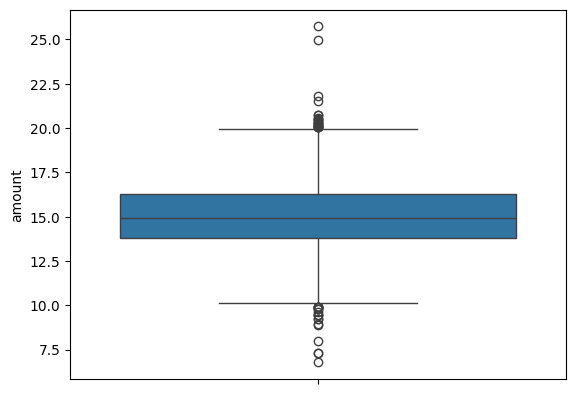

In [88]:
# Check Amount column for outliers.
sns.boxplot(data=np.log1p(df['amount']))
plt.show()



Note: There outliers in the amount column.

In [89]:
# Fill the Null values with median values.
# clean the missing values
df['amount'].fillna(df['amount'].median(), inplace=True)

In [90]:
# Cleaning stage column
df['series'].unique()
df['series']=df['series'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',np.NaN)

In [91]:
import pandas as pd
import re

def categorize_series(df):
    # Convert 'series' column to lowercase for case-insensitive operations
    df['series'] = df['series'].astype(str).str.lower()

    # Step 1: Replace Exit Option stages
    df.loc[df['series'].str.contains('post ipo|post series a', regex=True, case=False), 'series'] = 'exit option'

    # Step 2: Replace Scaling stages
    df.loc[df['series'].str.contains('mid series|series b\+|private equity|venture - series unknown', regex=True, case=False), 'series'] = 'scaling'

    # Step 3: Replace Early Traction stages
    df.loc[df['series'].str.contains('series [abcdefghi]|early seed', regex=True, case=False), 'series'] = 'early traction'

    # Step 4: Replace Validation stages
    df.loc[df['series'].str.contains('seed|angel', regex=True, case=False), 'series'] = 'validation'

    # Step 5: Replace Ideation stages
    df.loc[df['series'].str.contains('pre[ -]?seed', regex=True, case=False), 'series'] = 'ideation'

    # Step 6: Replace Others
    df.loc[df['series'].str.contains('pre[ -]?series|bridge|corporate round|debt|undisclosed|secondary market|non-equity assistance|grant|funding round|nan', na=False, regex=True, case=False), 'series'] = 'others'

    # Step 7: Catch-all replacement for any remaining uncategorized values
    df.loc[~df['series'].isin(['others', 'early traction', 'validation', 'ideation', 'scaling', 'exit option']), 'series'] = 'others'

    return df

# Apply the categorization function to your existing DataFrame
categorize_series(df)

# Print the unique values after categorization
print(df['series'].unique())

['early traction' 'others' 'validation' 'scaling' 'exit option']


In [92]:
df['series'].value_counts()

series
others            1036
early traction     981
validation         812
scaling             49
exit option          1
Name: count, dtype: int64

In [93]:
# Chech for null values.
df['series'].isna().sum()

0

In [94]:
# Drop duplicate.
df.drop_duplicates(keep='first', inplace= True)
df.head()

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
0,Unbox Robotics,2019,Bangalore,AI,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon",BEENEXT,1200000.0,early traction,2021
1,upGrad,2015,Mumbai,Education,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...",Unilazer Ventures,120000000.0,others,2021
2,Lead School,2012,Mumbai,Education,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta",GSV Ventures,30000000.0,early traction,2021
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal",CDC Group,51000000.0,early traction,2021
4,FypMoney,2021,Gurgaon,Financial Services,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,Liberatha Kallat,2000000.0,validation,2021


In [95]:
# Rename the 'series' column to 'stage'
df.rename(columns={'series': 'stage'}, inplace=True)

In [96]:
df.isna().sum()

company_brand    0
founded          0
headquarter      0
sector           0
about_company    0
founders         0
investor         0
amount           0
stage            0
year             0
dtype: int64

# Exploratory Data Analysis

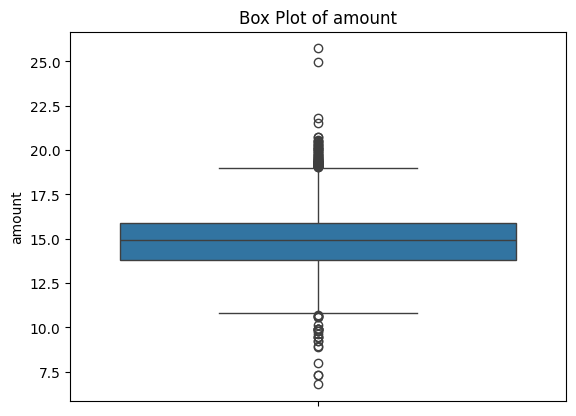

In [97]:
# Check Amount column for outliers.
sns.boxplot(data=np.log1p(df['amount']))
plt.title('Box Plot of amount')
plt.show()


Note: There is outliers in the in the amount column.

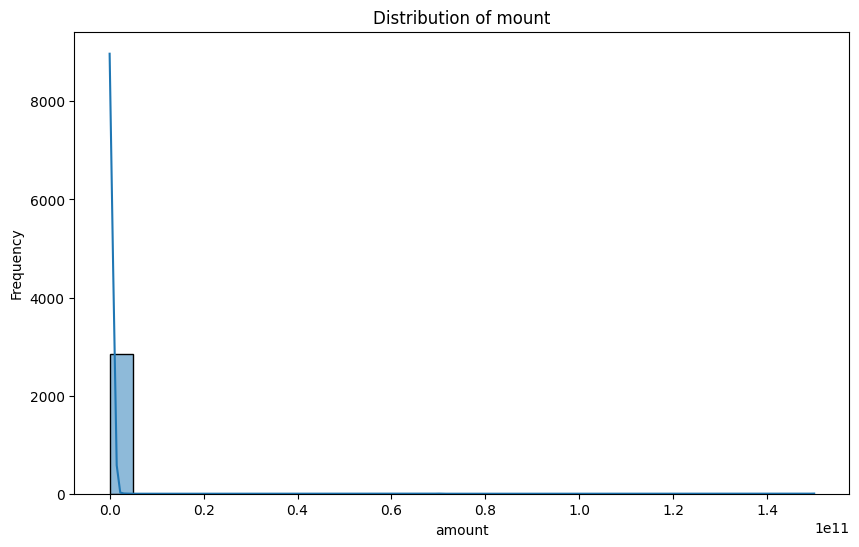

In [98]:
# Visualize the distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=30, kde=True)
plt.title('Distribution of mount')
plt.xlabel('amount')
plt.ylabel('Frequency')
plt.show()

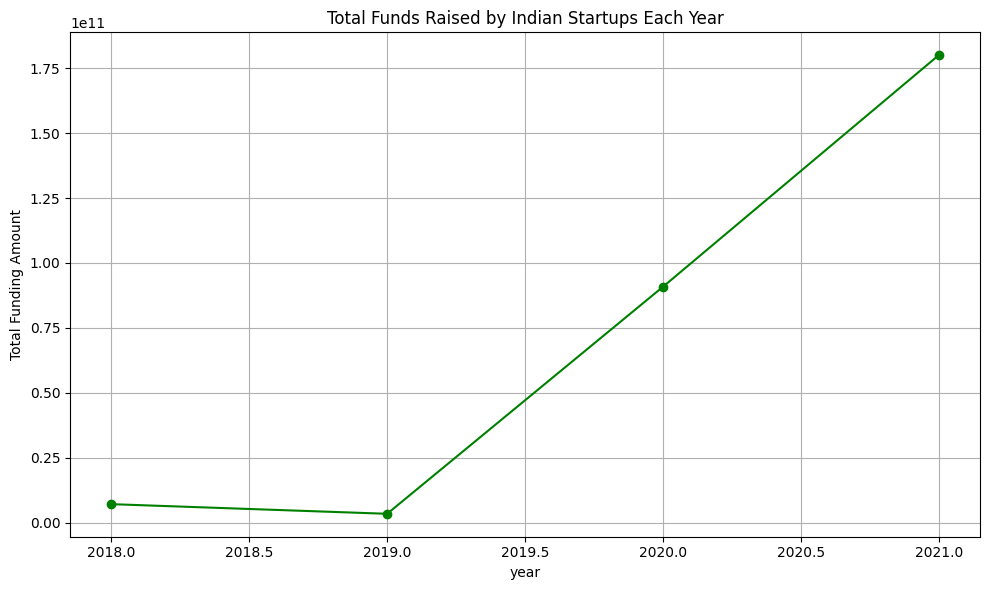

In [99]:
# Total Funds raised by Indian satrtup each year.

# Filter data for Indian startups
#indian_startups = data[data['Country'] == 'India']

# Group by year and calculate sum of funding amounts
funds_raised_by_year = df.groupby('year')['amount'].sum()

# Plotting
plt.figure(figsize=(10, 6))
funds_raised_by_year.plot(kind='line', marker='o', color='green')
plt.title('Total Funds Raised by Indian Startups Each Year')
plt.xlabel('year')
plt.ylabel('Total Funding Amount')
plt.grid(True)
plt.tight_layout()
plt.show()


Notes:
Funding experienced a modest decline from 2018 to 2019, followed by a remarkable increase of over from 2019 to 2021.

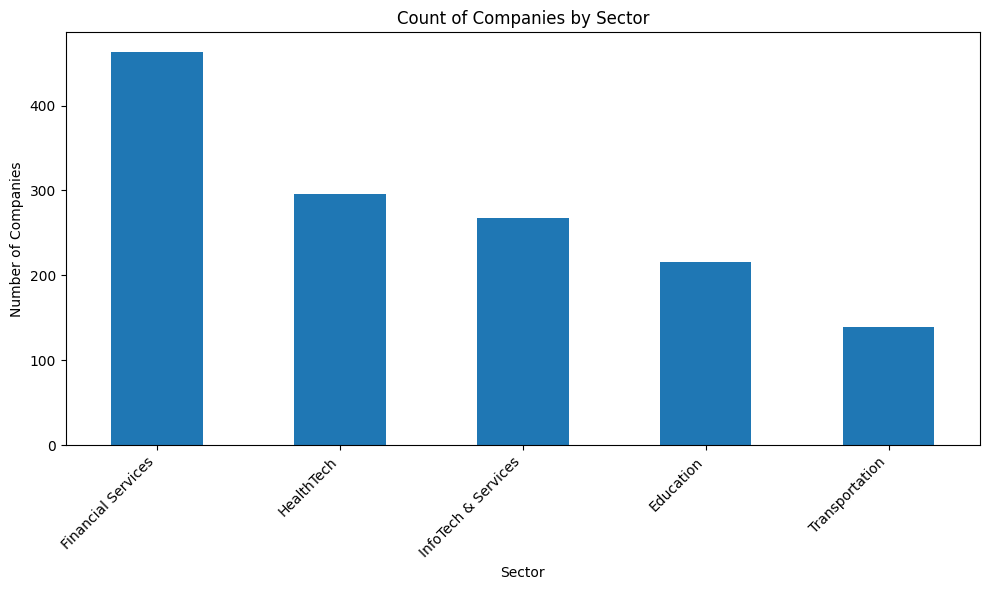

In [100]:

#Count of company by sector


def plot_sector_counts(dataframe, column_name, top_n=5):
    """
    Plots the counts of companies by sector.

    Parameters:
    dataframe (pandas.DataFrame): The DataFrame containing the data.
    column_name (str): The column name to count values from.
    top_n (int): The number of top sectors to display. Default is 5.

    Returns:
    None
    """
    # Count the values in the specified column and get the top N
    sector_counts = df['sector'].value_counts().head(5)

    # Plot the counts of companies by sector
    plt.figure(figsize=(10, 6))
    sector_counts.plot(kind='bar')
    plt.title('Count of Companies by Sector')
    plt.xlabel('Sector')
    plt.ylabel('Number of Companies')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot the graph using the sample DataFrame
plot_sector_counts(df, 'sector')


Note: Financial Services has the  highest number of companies followed by HealthTech, followed by InfoTech, and Educational and Transportation.

founder Count
1    1429
2     875
3     397
4     126
5      23
6       4
7       1
8       1
Name: count, dtype: int64


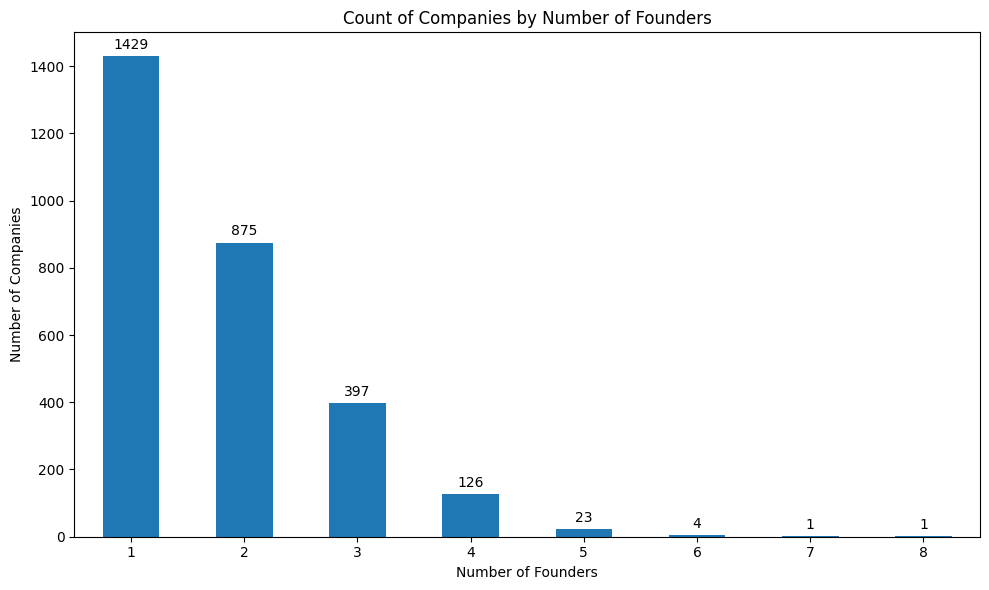

In [101]:
# Count of companies by founders.
# Calculate the number of founders for each company
df['founder Count'] = df['founders'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# Group by the 'Founder Count' column and count the number of companies
founder_counts = df['founder Count'].value_counts().sort_index()

# Display the results
print(founder_counts)

# Plot the results
plt.figure(figsize=(10, 6))
bars = founder_counts.plot(kind='bar')
plt.title('Count of Companies by Number of Founders')
plt.xlabel('Number of Founders')
plt.ylabel('Number of Companies')
plt.xticks(rotation=0)

# Add labels to each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center',
                  size=10, xytext=(0, 8),
                  textcoords='offset points')

plt.tight_layout()
plt.show()


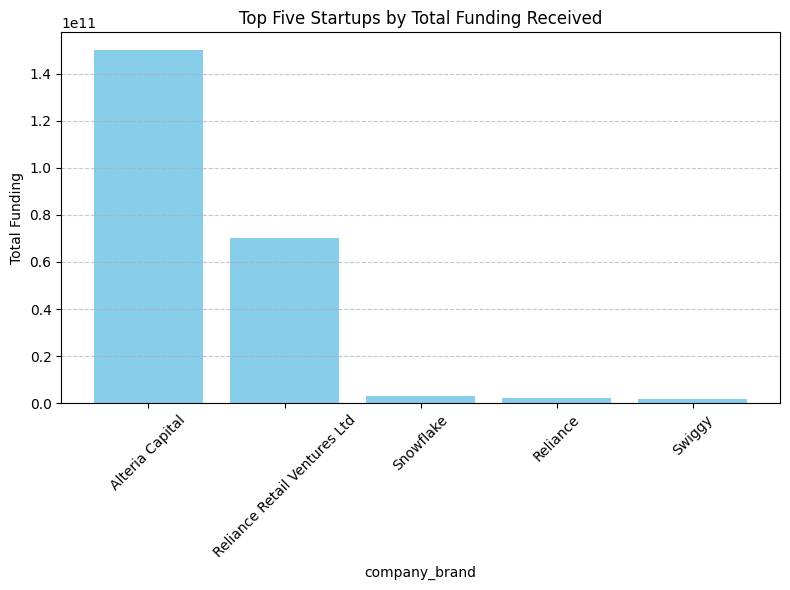

In [102]:
# what are the top five startups which are investors’ favorite?
# Group by startup name and sum the Amount column
funds_by_startup = df.groupby('company_brand')['amount'].sum().reset_index()

# Drop rows with None values in the 'startup' or 'amount' columns
funds_by_startup = funds_by_startup.dropna(subset=['company_brand', 'amount'])

# Sort the startups by total funding received in descending order
funds_by_startup = funds_by_startup.sort_values(by='amount', ascending=False)

# Extract the top five startups
top_five_startups = funds_by_startup.head(5)

# Plot the result
plt.figure(figsize=(8, 6))
plt.bar(top_five_startups['company_brand'], top_five_startups['amount'], color='skyblue')
plt.title('Top Five Startups by Total Funding Received')
plt.xlabel('company_brand')
plt.ylabel('Total Funding')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Notes: The bar chart highlights the five startups that have received the most funding, Alteria been the first followed by Reliance Retail Ventures and follows as such. These startups are likely to be viewed as the most promising or having the highest growth potential by investors, hence be the investors’ favorite.

The highest type of investment made is AI with a total amount of 1327457520.0.


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' Apps'),
  Text(1, 0, 'AI'),
  Text(2, 0, 'AI Company'),
  Text(3, 0, 'AI platform'),
  Text(4, 0, 'Accomodation')])

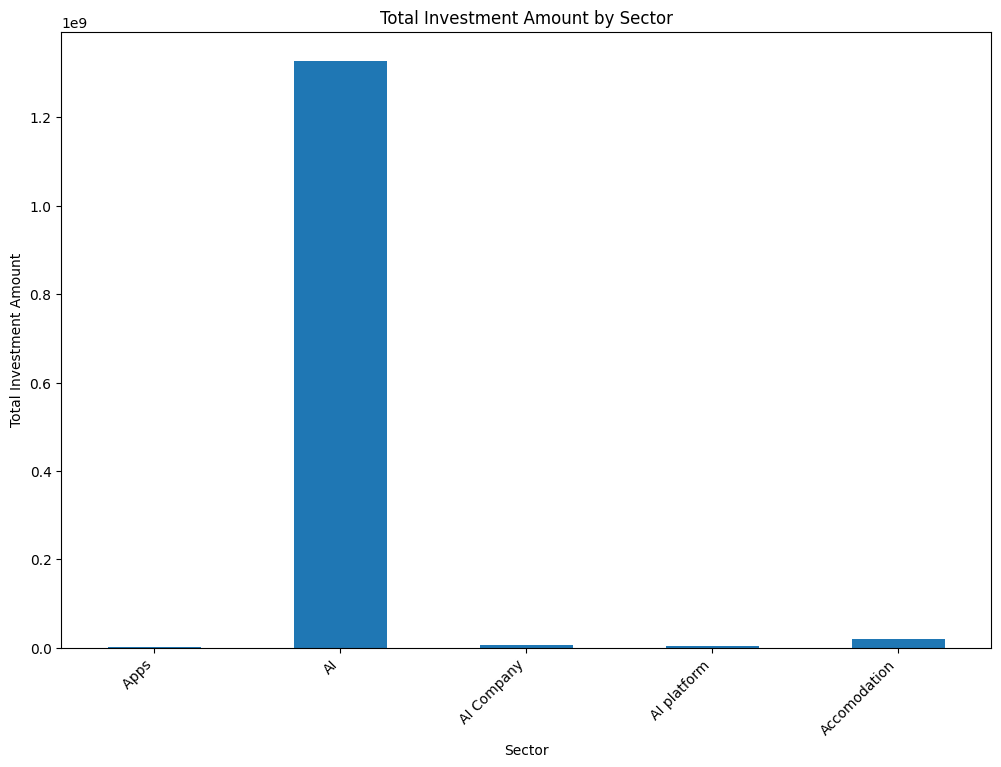

In [103]:
#  what is the highest type of investment made?
# Group by 'InvestmentType' and sum the 'Amount'
investment_totals = df.groupby('sector')['amount'].sum().head(5)

# Find the investment type with the highest total amount
highest_investment_type = investment_totals.idxmax()
highest_amount = investment_totals.max()

print(f"The highest type of investment made is {highest_investment_type} with a total amount of {highest_amount}.")

# Plot the results
plt.figure(figsize=(12, 8))
bars = investment_totals.plot(kind='bar')
plt.title('Total Investment Amount by Sector')
plt.xlabel('Sector')
plt.ylabel('Total Investment Amount')
plt.xticks(rotation=45, ha='right')

The highest type of investment made is AI

# Hypothesis Test

In [121]:
#Null Hypothesis (H0):
# Startups with multiple founders tend to raise significantly more money than those with a single founder.

# Alternate Hypothesis (H1):
# Startups with multiple founders do not raise significantly more money than those with a single founder.

from scipy.stats import ttest_ind


# Preprocess the data
df['num_founders'] = df['founders'].apply(lambda x: len(x.split(',')))

# Separate the startups into two groups
single_founder = df[df['num_founders'] ==1]['amount']
multiple_founders = df[df['num_founders'] > 1]['amount']

# Perform t-test to compare the amounts raised by the two groups
t_stat, p_value = ttest_ind(single_founder, multiple_founders)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Set the a significance level of alpha = 0.05 
alpha = 0.05

if p_value < 0.05:
    print("Reject the null hypothesis \n Startups with multiple founders tend to raise significantly more money than those with a single founder .")
else:
    print("Fail to reject the null hypothesis \n Startups with multiple founders tend to raise significantly more money than those with a single founder.")


T-statistic: 1.3093100424743356
P-value: 0.1905347470508802
Fail to reject the null hypothesis 
 Startups with multiple founders tend to raise significantly more money than those with a single founder.


# Analytical questions

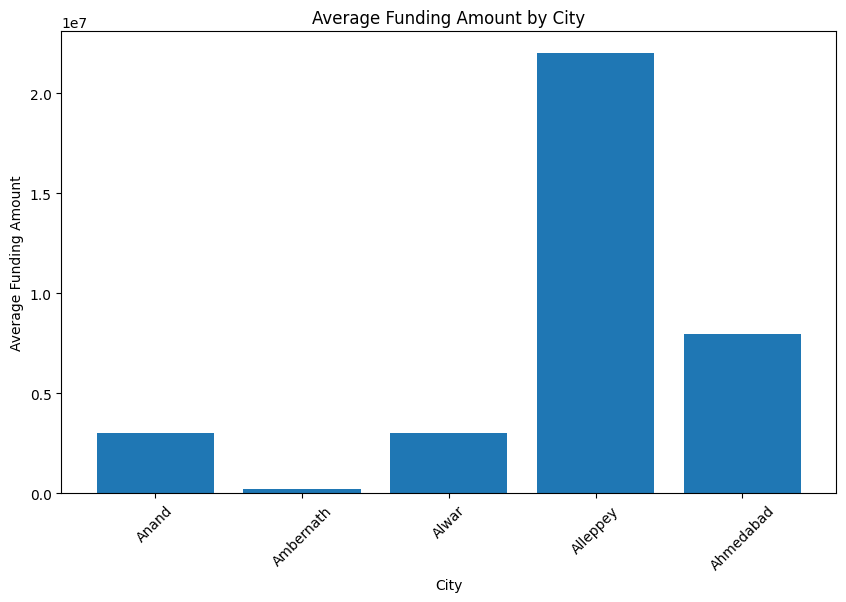

In [105]:
# What is the average funding amount for startups based in different cities?
# Group by city and calculate the average funding amount
average_funding_by_city = df.groupby(by= 'headquarter')['amount'].mean().reset_index().head(5)

# Sort the data by average funding amount for better visualization
average_funding_by_city = average_funding_by_city.sort_values(by = 'headquarter', ascending=False)

       
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(average_funding_by_city['headquarter'], average_funding_by_city['amount'])
plt.title('Average Funding Amount by City')
plt.xlabel('City')
plt.ylabel('Average Funding Amount')
plt.xticks(rotation=45)
plt.show()

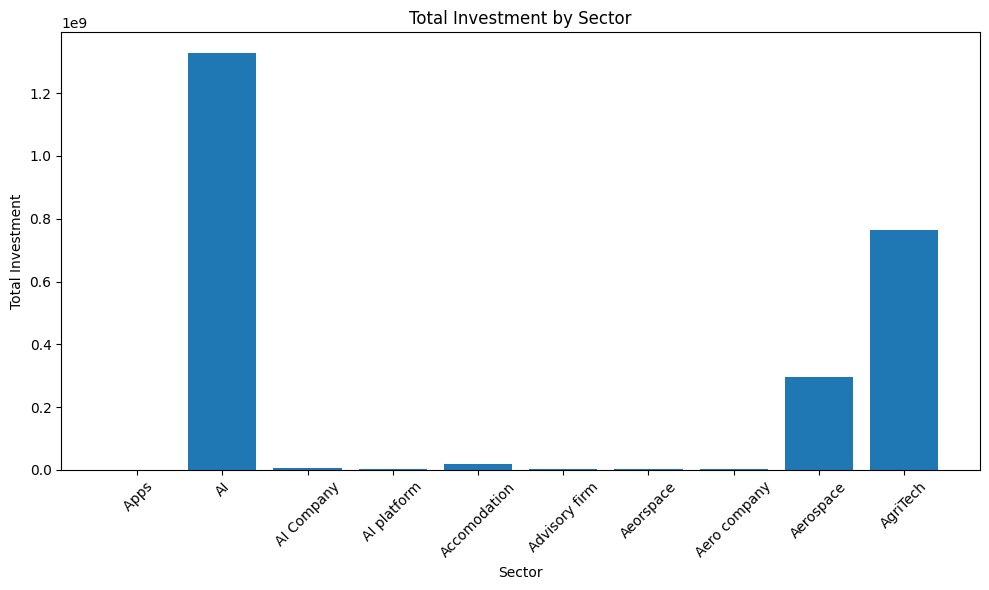

In [106]:
# How does the total investment compare across different sectors?

total_investment_by_sector = df.groupby(by='sector')['amount'].sum().reset_index().head(10)

total_investment_by_sector


plt.figure(figsize=(10, 6))
plt.bar(total_investment_by_sector['sector'], total_investment_by_sector['amount'])
plt.xlabel('Sector')
plt.ylabel('Total Investment')
plt.title('Total Investment by Sector')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



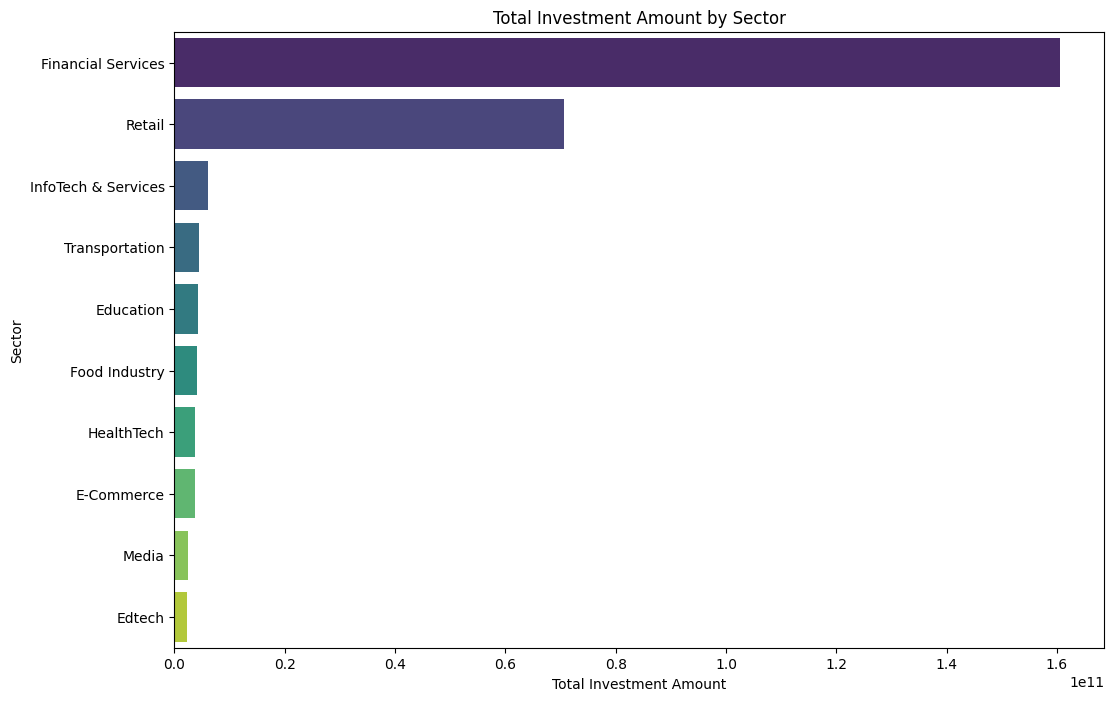

In [107]:
# Calculate the total investment amount by sector
total_investment_by_sector = df.groupby(by='sector')['amount'].sum().reset_index()

# Rename the columns for better readability
total_investment_by_sector.columns = ['Sector', 'Total Investment Amount']


# Sort the data by total investment amount for better visualization
total_investment_by_sector = total_investment_by_sector.sort_values(by='Total Investment Amount', ascending=False).head(10)

# Plot the total investment amount by sector
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Investment Amount', y='Sector', data=total_investment_by_sector, palette='viridis')
plt.title('Total Investment Amount by Sector')
plt.xlabel('Total Investment Amount')
plt.ylabel('Sector')
plt.show()

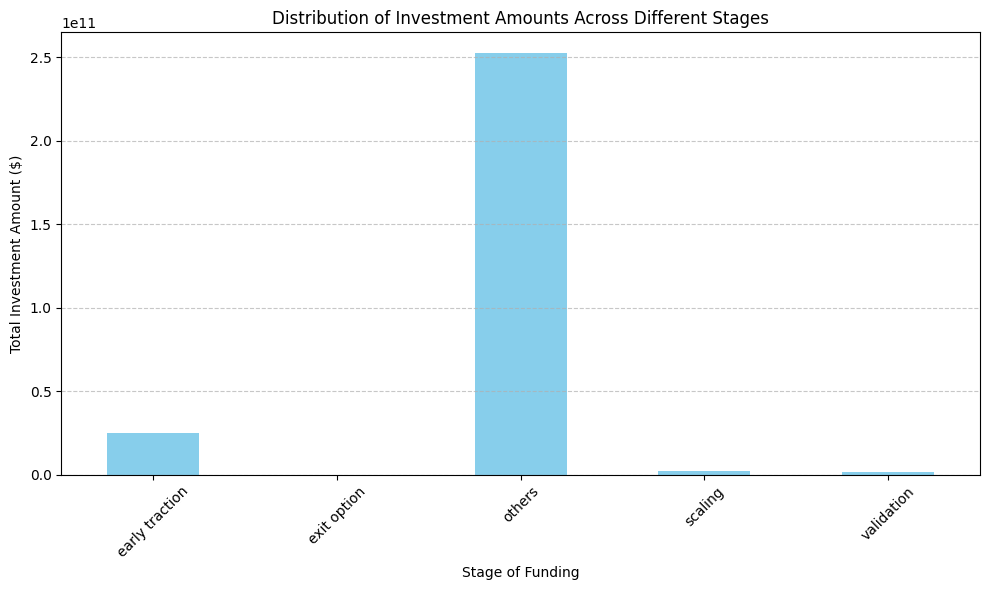

In [108]:
# What is the distribution of investment amounts across different stages of funding?

# Group by stage and sum the investment amounts
stage_distribution = df.groupby('stage')['amount'].sum()

# Plot the distribution
plt.figure(figsize=(10, 6))
stage_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Investment Amounts Across Different Stages')
plt.xlabel('Stage of Funding')
plt.ylabel('Total Investment Amount ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Distribution of Funding Amounts within Specific Sectors:
sector
 Apps            1.000000e+06
AI               1.327458e+09
AI Company       6.000000e+06
AI platform      3.000000e+06
Accomodation     1.920000e+07
Advisory firm    3.000000e+06
Aeorspace        1.800000e+06
Aero company     3.000000e+06
Aerospace        2.950000e+08
AgriTech         7.654020e+08
Name: amount, dtype: float64


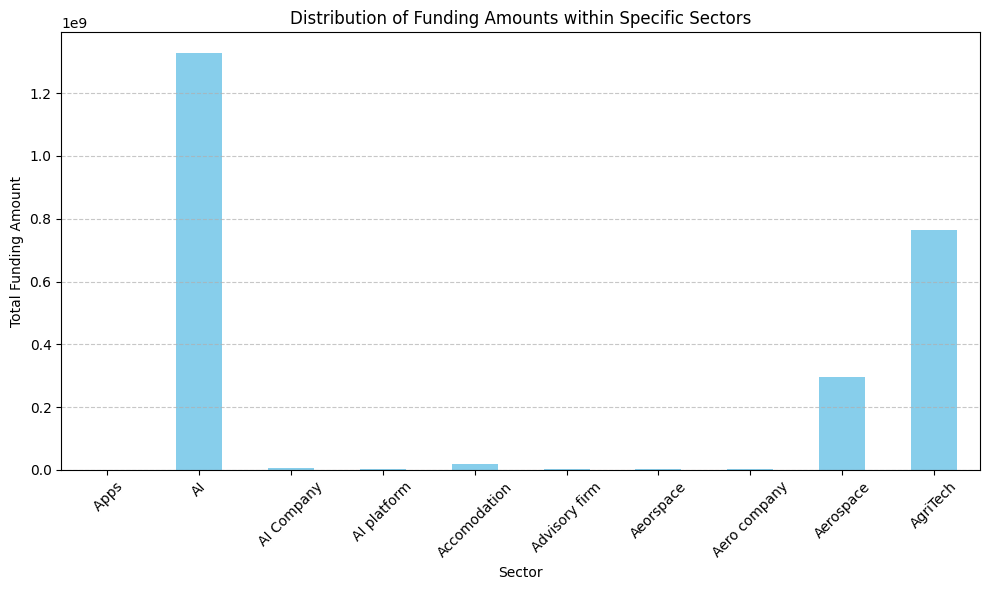

In [109]:
# What is the distribution of funding amounts within specific sectors?
# Group by sector and calculate sum of funding amounts
sector_distribution = df.groupby('sector')['amount'].sum().head(10)

print("Distribution of Funding Amounts within Specific Sectors:")
print(sector_distribution)

# Plotting
plt.figure(figsize=(10, 6))
sector_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Funding Amounts within Specific Sectors')
plt.xlabel('Sector')
plt.ylabel('Total Funding Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [110]:
df.to_csv("Indian_startup_ecosystem_final_dataset.csv")